In [2]:
import tensorflow as tf
from keras.layers import Input, Dense
from keras.models import Model
from keras.layers import LayerNormalization
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()


x = tf.Variable(3, name="x") 
y = tf.Variable(4, name="y") 
f=x*x*y+y+2


sess = tf.Session()
sess.run(x.initializer)
sess.run(y.initializer)
result = sess.run(f)
print(result)
sess.close()

Instructions for updating:
non-resource variables are not supported in the long term
42


In [5]:
import numpy as np
# Linear Regression with TensorFlow
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
m, n = housing.data.shape
housing_data_plus_bias = np.c_[np.ones((m, 1)), housing.data]
X = tf.constant(housing_data_plus_bias, dtype=tf.float32, name="X")
y = tf.constant(housing.target.reshape(-1, 1), dtype=tf.float32, name="y")
XT = tf.transpose(X)
theta = tf.matmul(tf.matmul(tf.matrix_inverse(tf.matmul(XT, X)), XT), y)
with tf.Session() as sess:
 theta_value = theta.eval()

11501568/11490434 [==============================] - 0s 0us/step


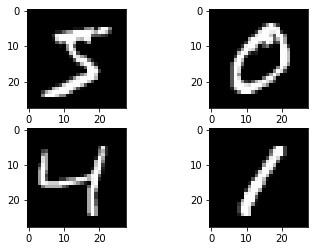

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 60000 samples, validate on 10000 samples
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


60000/60000 - 4s - loss: 0.2855 - acc: 0.9178 - val_loss: 0.1414 - val_acc: 0.9589 - 4s/epoch - 64us/sample
Epoch 2/10
60000/60000 - 4s - loss: 0.1141 - acc: 0.9668 - val_loss: 0.0965 - val_acc: 0.9711 - 4s/epoch - 74us/sample
Epoch 3/10
60000/60000 - 5s - loss: 0.0723 - acc: 0.9793 - val_loss: 0.0776 - val_acc: 0.9751 - 5s/epoch - 91us/sample
Epoch 4/10
60000/60000 - 4s - loss: 0.0521 - acc: 0.9848 - val_loss: 0.0700 - val_acc: 0.9782 - 4s/epoch - 65us/sample
Epoch 5/10
60000/60000 - 4s - loss: 0.0364 - acc: 0.9897 - val_loss: 0.0634 - val_acc: 0.9797 - 4s/epoch - 68us/sample
Epoch 6/10
60000/60000 - 4s - loss: 0.0267 - acc: 0.9927 - val_loss: 0.0693 - val_acc: 0.9781 - 4s/epoch - 66us/sample
Epoch 7/10
60000/60000 - 4s - loss: 0.0201 - acc: 0.9948 - val_loss: 0.0610 - val_acc: 0.9799 - 4s/epoch - 67us/sample
Epoch 8/10
60000/60000 - 4s - loss: 0.0150 - acc: 0.9969 - val_loss: 0.0609 - val_acc: 0.9814 - 4s/epoch - 65us/sample
Epoch 9/10
60000/60000 - 4s - loss: 0.0112 - acc: 0.9979 - 

In [9]:
#@title
# Plot ad hoc mnist instances
from keras.datasets import mnist
import matplotlib.pyplot as plt
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()


# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]


# define baseline model
def baseline_model():
# create model
  model = Sequential()
  model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
  model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
  # Compile model
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model


# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))